In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Filter for high confidence CMV

In [22]:
# Set up file name and path
path = "/Users/ishaharris/Projects/TCR/TCR-Isha/data/Count_Matrices/"
name = "VDJ_INFO_AC02"
f = f'{name}_countmatrix_ng.tsv'

# Load data - change to your desired file path

cm = pd.read_csv(os.path.join(path, f), sep="\t", header=0)


In [12]:
# Rename cols if necessary from clone_id to clonotype_id, and from junction_aa to amino_acid
cm.rename(columns={"clone_id": "clonotype_id", "junction_aa": "amino_acid"}, inplace=True)

cm

,cell_id,clonotype_id,v_call,d_call,j_call,c_call,amino_acid,positive
0,AAACCTGAGTACGTAA-1,AC02_clonotype9,TRBV6-5,NaN,TRBJ1-2,TRBC1,CASSPYTGTGYGYTF,110.0
1,AAACCTGCAAAGCAAT-1,AC02_clonotype9,TRBV6-5,NaN,TRBJ1-2,TRBC1,CASSPYTGTGYGYTF,85.0
2,AAACCTGCATCCGTGG-1,AC02_clonotype1,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,74.0
3,AAACCTGGTGTTCGAT-1,AC02_clonotype1,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,71.0
4,AAACCTGTCAAGAAGT-1,AC02_clonotype5,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,44.0
...,...,...,...,...,...,...,...,...
4121,TTTGTCAGTTGAGTTC-1,AC02_clonotype27,TRBV6-5,NaN,TRBJ1-2,TRBC1,CASSPYTGTGYGYTF,184.0
4122,TTTGTCATCAATAAGG-1,AC02_clonotype1,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,31.0
4123,TTTGTCATCACATAGC-1,AC02_clonotype8,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,52.0
4124,TTTGTCATCAGGTTCA-1,AC02_clonotype8,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,48.0


In [ ]:
# Count number of NAs
cm['clonotype_id'].isna().sum()

cm_clean=cm.dropna(subset=['clonotype_id'])


,cell_id,clonotype_id,v_call,d_call,j_call,c_call,amino_acid,positive
0,AAACCTGAGTACGTAA-1,AC02_clonotype9,TRBV6-5,NaN,TRBJ1-2,TRBC1,CASSPYTGTGYGYTF,110.0
1,AAACCTGCAAAGCAAT-1,AC02_clonotype9,TRBV6-5,NaN,TRBJ1-2,TRBC1,CASSPYTGTGYGYTF,85.0
2,AAACCTGCATCCGTGG-1,AC02_clonotype1,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,74.0
3,AAACCTGGTGTTCGAT-1,AC02_clonotype1,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,71.0
4,AAACCTGTCAAGAAGT-1,AC02_clonotype5,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,44.0
...,...,...,...,...,...,...,...,...
4121,TTTGTCAGTTGAGTTC-1,AC02_clonotype27,TRBV6-5,NaN,TRBJ1-2,TRBC1,CASSPYTGTGYGYTF,184.0
4122,TTTGTCATCAATAAGG-1,AC02_clonotype1,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,31.0
4123,TTTGTCATCACATAGC-1,AC02_clonotype8,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,52.0
4124,TTTGTCATCAGGTTCA-1,AC02_clonotype8,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,48.0


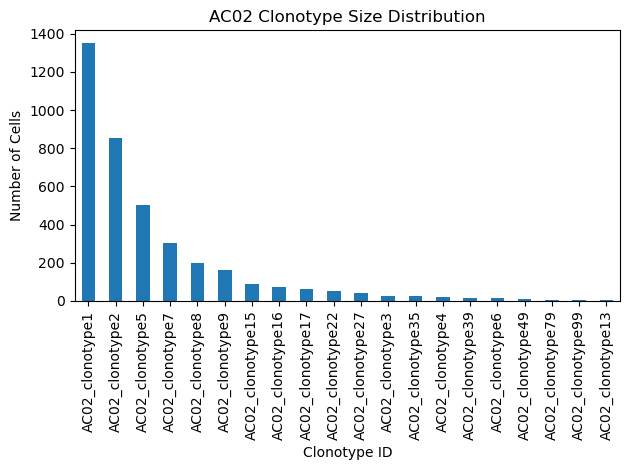

In [ ]:
# Visualise the distribution of clonotypes

clonotype_counts = cm_clean['clonotype_id'].value_counts()
clonotype_counts.head(20).plot(kind="bar")
plt.xlabel('Clonotype ID')
plt.ylabel('Number of Cells')
plt.title(f'{exp_name} Clonotype Size Distribution')
plt.tight_layout()

#plt.savefig(f"/Users/ishaharris/Projects/TCR/TCR-Isha/figs/Clono_size_distributions/{exp_name}_clono_distrib.png")


### Extract CMV-associated TCRs
Assume positive when count>10

In [17]:
cm_clean.columns

Index(['cell_id', 'clonotype_id', 'v_call', 'd_call', 'j_call', 'c_call',
       'amino_acid', 'positive'],
      dtype='object')

In [18]:
# Set name of CMV peptide(s).
# Remember that some experiments have multiple CMV peptides - need to rewrite the code to account for this. 
cmv_peptide_name = 'positive'

# Filter for CMV associated clonos
cm_filtered = cm_clean[cm_clean[cmv_peptide_name] > 10]
cmv_clono_counts = cm_filtered['clonotype_id'].value_counts()

#Minimum value in positive for cm_filtered
cm_filtered[cmv_peptide_name].min()


11.0

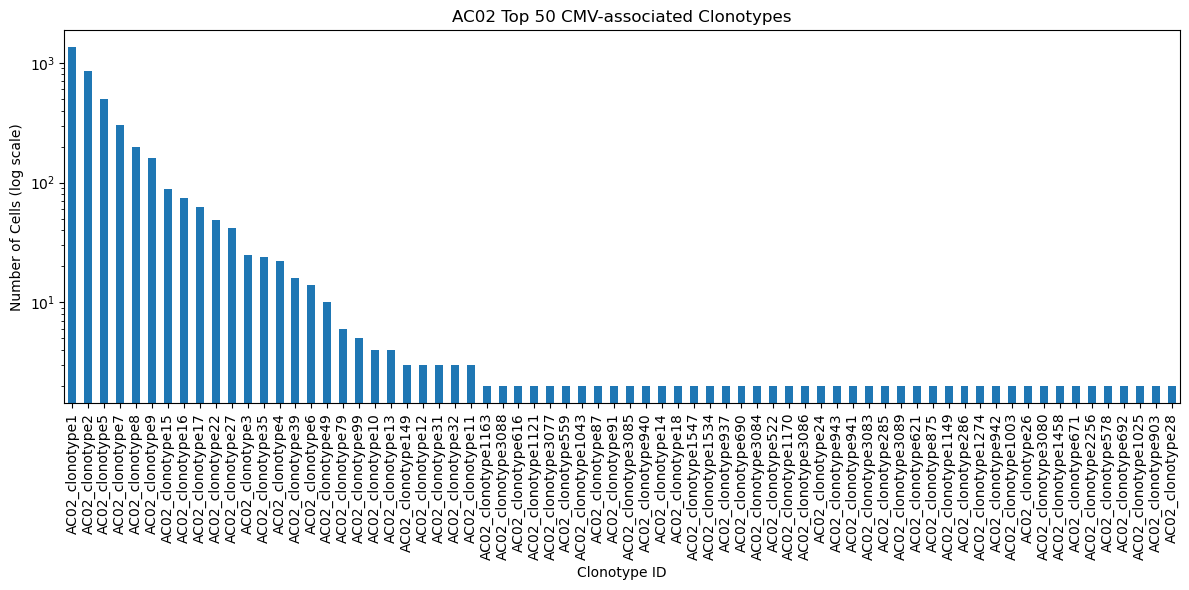

In [19]:
# Get top 50 clonotypes by count
top50 = cmv_clono_counts.sort_values(ascending=False).head(70)

# Plot as bar chart
plt.figure(figsize=(12, 6))
top50.plot(kind='bar')
plt.yscale('log')
plt.xlabel('Clonotype ID')
plt.ylabel('Number of Cells (log scale)')
plt.title(f'{exp_name} Top 50 CMV-associated Clonotypes')
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.tight_layout()
plt.show()


In [20]:
cm_filtered.head()
cm_filtered.sample(20)

,cell_id,clonotype_id,v_call,d_call,j_call,c_call,amino_acid,positive
2850,GGGCATCAGCTGATAA-1,AC02_clonotype17,TRBV6-5,NaN,TRBJ1-2,TRBC1,CASSPSTGASYGYTF,78.0
1545,CGACTTCGTTGTACAC-1,AC02_clonotype2,TRBV28,NaN,TRBJ1-1,TRBC1,CASSFQGYTEAFF,62.0
1723,CGTAGCGTCTTGTCAT-1,AC02_clonotype9,TRBV6-5,NaN,TRBJ1-2,TRBC1,CASSPYTGTGYGYTF,138.0
201,AATCGGTTCCGTAGTA-1,AC02_clonotype1,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,72.0
2659,GCTTGAACAGGCAGTA-1,AC02_clonotype5,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,40.0
1055,CACAGTAGTCTCTTTA-1,AC02_clonotype17,TRBV6-5,NaN,TRBJ1-2,TRBC1,CASSPSTGASYGYTF,96.0
1529,CGAATGTGTAATTGGA-1,AC02_clonotype1,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,69.0
2348,GATCGCGCAGGCTGAA-1,AC02_clonotype9,TRBV6-5,NaN,TRBJ1-2,TRBC1,CASSPYTGTGYGYTF,100.0
1130,CAGATCATCGCTTAGA-1,AC02_clonotype5,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,27.0
2598,GCTCCTATCATACGGT-1,AC02_clonotype5,TRBV12-4,NaN,TRBJ2-1,TRBC2,CASSSVNEQFF,78.0


In [25]:
# Export a list of TCRbs associated with high conf clonos

filename = f'{name}_high_conf_CMV_TCRs.csv'

cm_filtered_cols = cm_filtered[['clonotype_id','amino_acid','positive', 'v_call','d_call','j_call']]
cm_filtered_cols = cm_filtered_cols.rename(columns={'positive': 'count'})

# export
output_dir = "/Users/ishaharris/Projects/TCR/TCR-Isha/data/High_Confidence_CMV_TCR"
filepath = os.path.join(output_dir,filename)

cm_filtered_cols.to_csv(filepath, index=False)



### Create a CMV-matches dataframe for all repertoires and all CMV-associated TRBs from IM1, IM2, IM3.
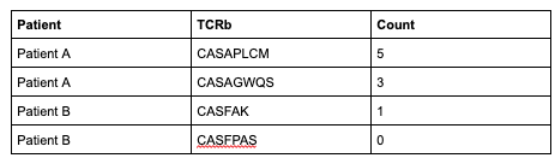

In [26]:
# Load in high confidence CMV data

# Set path
high_conf_path = f"/Users/ishaharris/Projects/TCR/TCR-Isha/data/High_Confidence_CMV_TCR/{name}_high_conf_CMV_TCRs.csv"

#Load file
cmv_high_conf_df = pd.read_csv(high_conf_path)

cmv_high_conf_df.sample(20)

,clonotype_id,amino_acid,count,v_call,d_call,j_call
1259,AC02_clonotype1,CASSSVNEQFF,67.0,TRBV12-4,NaN,TRBJ2-1
1317,AC02_clonotype1,CASSSVNEQFF,44.0,TRBV12-4,NaN,TRBJ2-1
1592,AC02_clonotype125,CASSLLEDRRNTIYF,59.0,TRBV7-9,NaN,TRBJ1-3
97,AC02_clonotype1,CASSSVNEQFF,78.0,TRBV12-4,NaN,TRBJ2-1
183,AC02_clonotype1,CASSSVNEQFF,38.0,TRBV12-4,NaN,TRBJ2-1
549,AC02_clonotype2971,CASSLLQNLNTGELFF,57.0,TRBV7-9,NaN,TRBJ2-2
2337,AC02_clonotype22,CASSSVNEQFF,22.0,TRBV12-4,NaN,TRBJ2-1
1061,AC02_clonotype22,CASSSVNEQFF,70.0,TRBV12-4,NaN,TRBJ2-1
3804,AC02_clonotype1,CASSSVNEQFF,61.0,TRBV12-4,NaN,TRBJ2-1
1834,AC02_clonotype2,CASSFQGYTEAFF,99.0,TRBV28,NaN,TRBJ1-1


In [31]:
cmv_high_conf_trb = cmv_high_conf_df['amino_acid']

In [32]:
# How many unique TRBs?

len(cmv_high_conf_trb.unique())

216

### Filter the repertoires for correct HLA and CMV annotated

In [33]:
os.chdir("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires")

metadata = pd.read_csv("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/Cohort01_whole_metadata.tsv", sep="\t") 

In [34]:
# Set HLA of interest - change dynamically
hla = 'A*02'
hla_name = hla.replace('*','')


In [35]:
os.chdir("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires")

metadata = pd.read_csv("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/Cohort01_whole_metadata.tsv", sep="\t") 


metadata_annotat = metadata[metadata['sample_tags'].str.contains(f'HLA-{hla}',case=False, regex = False)]

metadata_annotat = metadata_annotat[metadata_annotat['sample_tags'].str.contains(r'\bcytomegalovirus|CNV\b', case=False, na=False)]
metadata_annotat = metadata_annotat.reset_index(drop=True)

file_names = [name + '.tsv' for name in metadata_annotat['sample_name'].tolist()]


metadata_annotat.loc[10,'sample_tags']

print(f'Number of files with CMV and HLA annotation: {len(file_names)}')
metadata.loc[metadata['sample_name']=='P00108']



############################ IGNORE ##########################
# a11_cmv_annotation =a11_metadata[a11_metadata['sample_tags'].str.contains(r'\bcytomegalovirus|CNV\b', case=False, na=False)]

# print(f'Number of files with CMV annotation: {a11_cmv_annotation.shape}')
# print(f'Total number of files: {a11_metadata.shape}')

# # Prepare a list of files with CMV annotation
# a11_cmv_annotation['sample_name'].tolist()


# # save as a csv file
# with_tsv_path = "/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/List_Of_CMV_Annotated_Repertoires.csv"

# with open(with_tsv_path, 'w') as f:
#     for path in with_tsv:
#         f.write(path + '\n')


Number of files with CMV and HLA annotation: 292


,sample_name,total_rearrangements,productive_rearrangements,productive_clonality,sample_tags
232,P00108,272019,221085,0.0476,"Cohort 01, Cytomegalovirus -, HLA MHC Class I,..."


### Pre-process file to run over reps and extract relevant cols

AN UPDATED VERSION OF THIS IS IN TCRDIST.IPYNB

In [ ]:
import pandas as pd
import os

input_dir = '/Volumes/IshaVerbat/Isha/TCR/All_Emerson_Cohort01'
output_dir = '/Volumes/IshaVerbat/Isha/TCR/All_Emerson_Filtered'
os.makedirs(output_dir, exist_ok=True)

#file_names is previously calculated A02 repertoires


# List of desired columns
columns_to_extract = [
    'rearrangement', 'amino_acid','seq_reads', 'frequency', 'productive_frequency' 'templates'
]

for i, file in enumerate(file_names, start = 1):
    print(f"Processing file {i}/{len(file_names)}: {file}")
    print(f'Processing {file}')
    if file.endswith('.tsv') and file.startswith('P'):
        try:
            df = pd.read_csv(os.path.join(input_dir, file), sep='\t', usecols=columns_to_extract)
            df.to_csv(os.path.join(output_dir, file), sep='\t', index=False)
        except ValueError as e:
            print(f"Skipping {file}: {e}")


Processing file 1/292: P00492.tsv
Processing P00492.tsv
Processing file 2/292: P00412.tsv
Processing P00412.tsv
Processing file 3/292: P00416.tsv
Processing P00416.tsv
Processing file 4/292: P00037.tsv
Processing P00037.tsv
Processing file 5/292: P00346.tsv
Processing P00346.tsv
Processing file 6/292: P00353.tsv
Processing P00353.tsv
Processing file 7/292: P00278.tsv
Processing P00278.tsv
Processing file 8/292: P00260.tsv
Processing P00260.tsv
Processing file 9/292: P00208.tsv
Processing P00208.tsv
Processing file 10/292: P00143.tsv
Processing P00143.tsv
Processing file 11/292: P00085.tsv
Processing P00085.tsv
Processing file 12/292: P00625.tsv
Processing P00625.tsv
Processing file 13/292: P00572.tsv
Processing P00572.tsv
Processing file 14/292: P00496.tsv
Processing P00496.tsv
Processing file 15/292: P00422.tsv
Processing P00422.tsv
Processing file 16/292: P00381.tsv
Processing P00381.tsv
Processing file 17/292: P00570.tsv
Processing P00570.tsv
Processing file 18/292: P00313.tsv
Proce

In [ ]:
test = pd.read_csv('/Volumes/IshaVerbat/Isha/TCR/All_Emerson_Filtered/P00289.tsv', sep='\t')

,rearrangement,amino_acid,templates,seq_reads,frequency
0,GCCTTGTTGCTGGGGGACTCGGCCCTGTATCTCTGTGCCAGCAGCT...,CASSLRGQERNTEAFF,NaN,245,0.000205
1,GTGAACGCCTTGTTGCTGGGGGACTCGGCCCTGTATCTCTGTGCCA...,CASSLLGVYSPLHF,NaN,120,0.000101
2,GTGAACGCCTTGTTGCTGGGGGACTCGGCCCTGTATCTCTGTGCCA...,CASSSGARDSPLHF,NaN,32,0.000027
3,GAATGTGAACGCCTTGTTGCTGGGGGACTCGGCCCTGTATCTCTGT...,NaN,NaN,27,0.000023
4,GCCTTGTTGCTGGGGGACTCGGCCCTGTATCTCTGTGCCAGCAGCC...,CASSLSPSFSGNTIYF,NaN,65,0.000054


### New fast loop: hash lookup 

In [ ]:
# Set dir
os.chdir('/Volumes/IshaVerbat/Isha/TCR/All_Emerson_Filtered')

# Turn unique TRBs into a set
trb_set = set(cmv_high_conf_trb.unique())

# Initialise records
records = []

# Main loop
for i, file in enumerate(file_names, start = 1):
    print(f"Processing file {i}/{len(file_names)}: {file}")

    patient_id = file.rsplit('.',1)[0]
    print(f'Patient ID: {patient_id}')

    # Read repertoire
    rep = pd.read_csv(file, sep="\t")
    rep = rep.dropna(subset=['amino_acid'])

    # Turn into a dict
    freq_dict = pd.Series(rep['frequency'].values, index = rep['amino_acid']).to_dict()

    # Find the intersection
    hits = trb_set.intersection(freq_dict.keys())
    print(f"Number of hits: {len(hits)}")

    for seq in hits:
        records.append({
            'patient_id': patient_id,
            'sequence': seq,
            'frequency': freq_dict[seq]
        })

records_df = pd.DataFrame(records)


Processing file 1/292: P00492.tsv
Patient ID: P00492
Number of hits: 14
Processing file 2/292: P00412.tsv
Patient ID: P00412
Number of hits: 18
Processing file 3/292: P00416.tsv
Patient ID: P00416
Number of hits: 17
Processing file 4/292: P00037.tsv
Patient ID: P00037
Number of hits: 15
Processing file 5/292: P00346.tsv
Patient ID: P00346
Number of hits: 8
Processing file 6/292: P00353.tsv
Patient ID: P00353
Number of hits: 15
Processing file 7/292: P00278.tsv
Patient ID: P00278
Number of hits: 9
Processing file 8/292: P00260.tsv
Patient ID: P00260
Number of hits: 9
Processing file 9/292: P00208.tsv
Patient ID: P00208
Number of hits: 9
Processing file 10/292: P00143.tsv
Patient ID: P00143
Number of hits: 14
Processing file 11/292: P00085.tsv
Patient ID: P00085
Number of hits: 7
Processing file 12/292: P00625.tsv
Patient ID: P00625
Number of hits: 7
Processing file 13/292: P00572.tsv
Patient ID: P00572
Number of hits: 1
Processing file 14/292: P00496.tsv
Patient ID: P00496
Number of hit

In [ ]:
# Write the loop - OLD SLOW LOOP!

os.chdir('/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/Emerson_Cohort01')

records = []
for i, file in enumerate(file_names, start=1):
    # Print progress
    print(f"Processing file {i}/{len(file_names)}: {file}")
    
    # Patient ID
    patient_id = file.split('.')[0]
    print(f"Patient ID: {patient_id}")
    # Read the file
    rep = pd.read_csv(file, sep="\t")

    clono_count = rep['cdr3_amino_acid'].value_counts()

    # Get the TCRb sequences that are present in the list of CMV associated peptides
    hits = clono_count[clono_count.index.isin(unique_trb)]
    print(f"Number of hits: {len(hits)}")

    for seq, counts in hits.items():
        records.append({
            'patient_id': patient_id,
            'sequence': seq,
            'count': counts
        })

records_df = pd.DataFrame(records)

In [31]:
records_df

,patient_id,sequence,count
0,P00492,CASGPSNQPQHF,1.373438e-06
1,P00492,CASRDGRNYGYTF,6.867188e-07
2,P00492,CASSSANYGYTF,1.405027e-04
3,P00492,CASSLTGYGYTF,1.922813e-06
4,P00492,CASSLGQGQPQHF,2.334844e-06
...,...,...,...
3980,P00289,CASSLGQGQPQHF,8.377939e-06
3981,P00289,CASSFQGYTEAFF,2.345823e-05
3982,P00289,CASSLGETQYF,6.702351e-06
3983,P00289,CSVGTGGTNEKLFF,3.351176e-06


In [62]:
records_df

,patient_id,sequence,count
0,P00187,CASSLYENTEAFF,2
1,P00553,CASSEGGWTEAFF,1
2,P00092,CASSLYENTEAFF,2
3,P00092,CASSLYRGQGNQPQHF,1
4,P00033,CASSEGGWTEAFF,2
5,P00033,CASSLYENTEAFF,1
6,P00249,CASRQVSEQYF,1
7,P00108,CAISEGLAGGETQYF,1
8,P00175,CASSLYENTEAFF,1
9,P00495,CASSDGTMNTEAFF,2


In [32]:
# Check whether matches are positive or negative

#Gets indices of positive and negative 
cmv_positive_indices = metadata_annotat['sample_tags'].str.contains(r'\bcytomegalovirus \+|\bcmv \+\b', case=False, na=False)

cmv_negative_indices = metadata_annotat['sample_tags'].str.contains(r'\bcytomegalovirus \-|\bcmv \-\b', case=False, na=False)

# Extract patient IDs for CMV positive and negative
list_cmv_positive_ids = metadata_annotat.loc[cmv_positive_indices, 'sample_name'].unique().tolist()

list_cmv_negative_ids = metadata_annotat.loc[cmv_negative_indices, 'sample_name'].unique().tolist()

print(f'{exp_name} CMV positive repertoires: {len(list_cmv_positive_ids)}')
print(f'{exp_name} CMV negative repertoires: {len(list_cmv_negative_ids)}')

records_df.head()


AC02 CMV positive repertoires: 136
AC02 CMV negative repertoires: 156


,patient_id,sequence,count
0,P00492,CASGPSNQPQHF,1.373438e-06
1,P00492,CASRDGRNYGYTF,6.867188e-07
2,P00492,CASSSANYGYTF,1.405027e-04
3,P00492,CASSLTGYGYTF,1.922813e-06
4,P00492,CASSLGQGQPQHF,2.334844e-06


In [34]:
# Adds a column to the records_df to indicate if the patient is CMV positive or negative

records_df['cmv_status'] = records_df['patient_id'].apply(lambda x: 'Positive' if x in list_cmv_positive_ids else 'Negative')

#cmv-associated_repertoires.csv has CMV status in it

records_df


,patient_id,sequence,count,cmv_status
0,P00492,CASGPSNQPQHF,1.373438e-06,Positive
1,P00492,CASRDGRNYGYTF,6.867188e-07,Positive
2,P00492,CASSSANYGYTF,1.405027e-04,Positive
3,P00492,CASSLTGYGYTF,1.922813e-06,Positive
4,P00492,CASSLGQGQPQHF,2.334844e-06,Positive
...,...,...,...,...
3980,P00289,CASSLGQGQPQHF,8.377939e-06,Positive
3981,P00289,CASSFQGYTEAFF,2.345823e-05,Positive
3982,P00289,CASSLGETQYF,6.702351e-06,Positive
3983,P00289,CSVGTGGTNEKLFF,3.351176e-06,Positive


In [40]:
records_df.rename(columns={'count':'frequency'}, inplace=True)

records_file_name = f'NEW_{exp_name}_hits.csv'

records_file_path = f'/Users/ishaharris/Projects/TCR/TCR-Isha/data/Processed/{records_file_name}'
records_df.to_csv(records_file_path, index=False)


In [41]:
records_df

,patient_id,sequence,frequency,cmv_status
0,P00492,CASGPSNQPQHF,1.373438e-06,Positive
1,P00492,CASRDGRNYGYTF,6.867188e-07,Positive
2,P00492,CASSSANYGYTF,1.405027e-04,Positive
3,P00492,CASSLTGYGYTF,1.922813e-06,Positive
4,P00492,CASSLGQGQPQHF,2.334844e-06,Positive
...,...,...,...,...
3980,P00289,CASSLGQGQPQHF,8.377939e-06,Positive
3981,P00289,CASSFQGYTEAFF,2.345823e-05,Positive
3982,P00289,CASSLGETQYF,6.702351e-06,Positive
3983,P00289,CSVGTGGTNEKLFF,3.351176e-06,Positive
